In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import combinations

%matplotlib inline

In [2]:
#data
molecule_dict = {}
molecule_dict['DEBGF(273 K)'] = {'kT':273,"Cohesive Energy (kcal/mol)":31.23,'V':248901.03,'rho':1.14,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(305 K)'] = {'kT':305,"Cohesive Energy (kcal/mol)":30.36,'V':252419.69,'rho':1.12,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(340 K)'] = {'kT':340,'Cohesive Energy (kcal/mol)':29.01,'V':257982.95,'rho':1.10,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(375 K)'] = {'kT':375,'Cohesive Energy (kcal/mol)':27.40,'V':264520.55,'rho':1.07,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(405 K)'] = {'kT':405,'Cohesive Energy (kcal/mol)':26.12,'V':270604.60,'rho':1.04,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(440 K)'] = {'kT':440,'Cohesive Energy (kcal/mol)':24.75,'V':277803.22,'rho':1.02,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(475 K)'] = {'kT':475,'Cohesive Energy (kcal/mol)':23.30,'V':286160.71,'rho':0.99,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(505 K)'] = {'kT':505,'Cohesive Energy (kcal/mol)':22.10,'V':294236.49,'rho':0.96,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(540 K)'] = {'kT':540,'Cohesive Energy (kcal/mol)':20.79,'V':303874.10,'rho':0.93,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(575 K)'] = {'kT':575,'Cohesive Energy (kcal/mol)':19.52,'V':314288.43,'rho':0.90,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
molecule_dict['DEBGF(600 K)'] = {'kT':600,'Cohesive Energy (kcal/mol)':18.75,'V':321468.57,'rho':0.88,'nmol':500,'mol_weight':340.423,'name':'DGEBA'}
df_DEBGA = pd.DataFrame.from_dict(molecule_dict, orient="index")

molecule_dict = {}
molecule_dict['DDS(273 K)'] = {'kT':273,'Cohesive Energy (kcal/mol)':28.55,'V':156680.56,'rho':1.32,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(305 K)'] = {'kT':305,'Cohesive Energy (kcal/mol)':27.98,'V':157994.45,'rho':1.30,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(340 K)'] = {'kT':340,'Cohesive Energy (kcal/mol)':27.32,'V':159528.91,'rho':1.29,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(375 K)'] = {'kT':375,'Cohesive Energy (kcal/mol)':26.61,'V':161309.42,'rho':1.28,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(405 K)'] = {'kT':405,'Cohesive Energy (kcal/mol)':25.71,'V':163829.46,'rho':1.26,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(440 K)'] = {'kT':440,'Cohesive Energy (kcal/mol)':24.68,'V':166750.55,'rho':1.24,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(475 K)'] = {'kT':475,'Cohesive Energy (kcal/mol)':23.39,'V':171126.79,'rho':1.20,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(505 K)'] = {'kT':505,'Cohesive Energy (kcal/mol)':22.50,'V':174465.55,'rho':1.18,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(540 K)'] = {'kT':540,'Cohesive Energy (kcal/mol)':21.42,'V':178998.43,'rho':1.15,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(575 K)'] = {'kT':575,'Cohesive Energy (kcal/mol)':20.41,'V':183514.06,'rho':1.12,'nmol':500,'mol_weight':248.306,'name':'DDS'}
molecule_dict['DDS(600 K)'] = {'kT':600,'Cohesive Energy (kcal/mol)':19.64,'V':187213.51,'rho':1.10,'nmol':500,'mol_weight':248.306,'name':'DDS'}
df_DDS = pd.DataFrame.from_dict(molecule_dict, orient="index")

molecule_dict = {}
molecule_dict['PES10(273 K)'] = {'kT':273,'Cohesive Energy (kcal/mol)':172.55,'V':148734.47,'rho':1.30,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(305 K)'] = {'kT':305,'Cohesive Energy (kcal/mol)':169.97,'V':149686.25,'rho':1.29,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(340 K)'] = {'kT':340,'Cohesive Energy (kcal/mol)':168.87,'V':149914.22,'rho':1.29,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(375 K)'] = {'kT':375,'Cohesive Energy (kcal/mol)':165.71,'V':151012.30,'rho':1.28,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(405 K)'] = {'kT':405,'Cohesive Energy (kcal/mol)':163.94,'V':152142.69,'rho':1.27,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(440 K)'] = {'kT':440,'Cohesive Energy (kcal/mol)':159.49,'V':154379.68,'rho':1.25,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(475 K)'] = {'kT':475,'Cohesive Energy (kcal/mol)':158.79,'V':155133.86,'rho':1.24,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(505 K)'] = {'kT':505,'Cohesive Energy (kcal/mol)':156.07,'V':156336.04,'rho':1.23,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(540 K)'] = {'kT':540,'Cohesive Energy (kcal/mol)':152.91,'V':157532.01,'rho':1.23,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(575 K)'] = {'kT':575,'Cohesive Energy (kcal/mol)':150.68,'V':158735.31,'rho':1.22,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
molecule_dict['PES10(600 K)'] = {'kT':600,'Cohesive Energy (kcal/mol)':147.77,'V':161192.93,'rho':1.20,'nmol':50,'mol_weight':2324.614,'name':'PES10'}
df_PES10 = pd.DataFrame.from_dict(molecule_dict, orient="index")

molecule_dict = {}
molecule_dict['PES(273 K)'] = {'kT':273,'Cohesive Energy (kcal/mol)':27.29,'V':150356.40,'rho':1.29,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(305 K)'] = {'kT':305,'Cohesive Energy (kcal/mol)':26.84,'V':151466.93,'rho':1.28,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(340 K)'] = {'kT':340,'Cohesive Energy (kcal/mol)':26.32,'V':152696.51,'rho':1.27,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(375 K)'] = {'kT':375,'Cohesive Energy (kcal/mol)':25.57,'V':155462.18,'rho':1.25,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(405 K)'] = {'kT':405,'Cohesive Energy (kcal/mol)':24.88,'V':157369.77,'rho':1.24,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(440 K)'] = {'kT':440,'Cohesive Energy (kcal/mol)':24.02,'V':160299.85,'rho':1.21,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(475 K)'] = {'kT':475,'Cohesive Energy (kcal/mol)':22.90,'V':164067.09,'rho':1.19,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(505 K)'] = {'kT':505,'Cohesive Energy (kcal/mol)':21.92,'V':167739.71,'rho':1.16,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(540 K)'] = {'kT':540,'Cohesive Energy (kcal/mol)':20.88,'V':172124.18,'rho':1.13,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(575 K)'] = {'kT':575,'Cohesive Energy (kcal/mol)':19.85,'V':176617.15,'rho':1.10,'nmol':500,'mol_weight':234.276,'name':'PES1'}
molecule_dict['PES(600 K)'] = {'kT':600,'Cohesive Energy (kcal/mol)':19.13,'V':180233.58,'rho':1.08,'nmol':500,'mol_weight':234.276,'name':'PES1'}
df_PES1 = pd.DataFrame.from_dict(molecule_dict, orient="index")


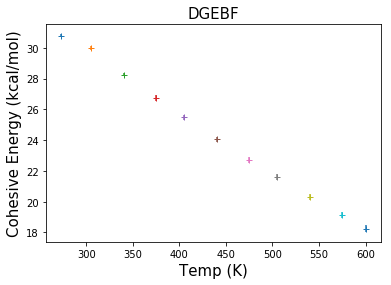

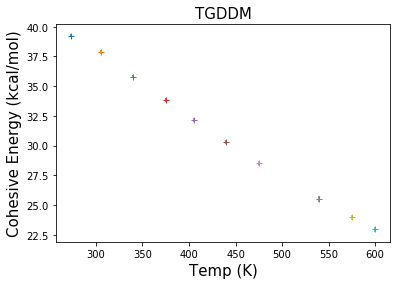

DGEBF Cohesive_Energy_kcal_per_mol(ave=24.299568455640745, std=4.315256810244349)
DGEBA  Cohesive_Energy_kcal_per_mol(ave=24.299568455640745, std=4.315256810244349)
TGDDM Cohesive_Energy_kcal_per_mol(ave=31.01181204819277, std=5.771660486644267)
PES Cohesive_Energy_kcal_per_mol(ave=23.6, std=2.862900626986553)
PES Cohesive_Energy_kcal_per_mol(ave=160.61363636363637, std=8.26703365509936)
DDS Cohesive_Energy_kcal_per_mol(ave=24.382727272727276, std=3.1197566921447284)


In [9]:
col_names = ["Frame Number", "Time (nsec)", "Volume (Angstrom^3)", "Density (g/cm^3)",
             "Cohesive Energy (kcal/mol)", "SolubilParam (MPa^(1/2))", "SolubilVdw (MPa^(1/2))", 
             "SolubilEle (MPa^(1/2))", "HeatOfVap (kcal/mol)"] 

file_path_A = "parameterization/Analysis_DGEBF/*/raw-data/bulk.dat"
file_path_B = "parameterization/Analysis_TGDDM/*/raw-data/bulk.dat"

def create_data_frame(file_path, col_names=col_names):
    new_df = {}

    for file_path in glob(file_path):
        temp = float(file_path.split("/")[2].split("_")[2])
        df = pd.read_csv(file_path, sep=" ",skipinitialspace=True, skiprows=[0,1], header=None, )
        df.columns = col_names
        num_rows = df.shape[0]
        percent = 0.20
        cut = -int(np.floor(num_rows*percent))
        ave_coe = df["Cohesive Energy (kcal/mol)"][cut:].mean()
        std_coe = df["Cohesive Energy (kcal/mol)"][cut:].std()
        new_df[temp] = {"Cohesive Energy (kcal/mol)": ave_coe,
                       "std": std_coe}
        
        plt.errorbar(temp, ave_coe, yerr=std_coe, marker="+",)
        plt.title(file_path.split("/")[1].split("_")[1], size=15)
    plt.xlabel("Temp (K)", size=15)
    plt.ylabel("Cohesive Energy (kcal/mol)", size=15)
    plt.show()
    return pd.DataFrame.from_dict(new_df, orient="index")

def get_average_coe(df):
    CohesiveEnergy = namedtuple('Cohesive_Energy_kcal_per_mol', ['ave', 'std'])
    num_rows = df.shape[0]
    percent = 0.20
    cut = -int(np.floor(num_rows*percent))
    ave_coe = df["Cohesive Energy (kcal/mol)"][cut:].mean()
    std_coe = df["Cohesive Energy (kcal/mol)"][cut:].std()
    
    return CohesiveEnergy(ave_coe, std_coe)

def get_average_coe_from_stephen(df):
    CohesiveEnergy = namedtuple('Cohesive_Energy_kcal_per_mol', ['ave', 'std'])
    ave_coe = df["Cohesive Energy (kcal/mol)"].mean()
    std_coe = df["Cohesive Energy (kcal/mol)"].std()
    
    return CohesiveEnergy(ave_coe, std_coe)


    

df_A = create_data_frame(file_path_A)
df_B = create_data_frame(file_path_B)
DGEBF_coe = get_average_coe_from_stephen(df_A)
TGDDM_coe = get_average_coe_from_stephen(df_B)
PES10_coe = get_average_coe_from_stephen(df_PES10)
PES1_coe = get_average_coe_from_stephen(df_PES1)
DDS_coe = get_average_coe_from_stephen(df_DDS)
DGEBA_coe = get_average_coe_from_stephen(df_DEBGA)
print("DGEBF", DGEBF_coe)
#print("DGEBA ", DGEBF_old_coe)
print("DGEBA ", DGEBF_coe)
print("TGDDM", TGDDM_coe)
print("PES", PES1_coe)
print("DDS", DDS_coe)
compound_dic = {"DGEBF": DGEBF_coe,
               "TGDDM":TGDDM_coe,
               "DGEBA": DGEBA_coe,
               "PES": PES1_coe,
               "DDS": DDS_coe}

In [ ]:
CohesiveEnergy = namedtuple("Cohesive_Energy_kcal_per_mol", ["ave", "std"])

compound_dic_test = {
    "DGEBF": DGEBF_coe,
    "TGDDM": TGDDM_coe,
    "DGEBA": DGEBA_coe,
    "PES": PES1_coe,
    "DDS": DDS_coe,
    "AAAA": CohesiveEnergy(100, 100),
}


compound_dic = {
    "DGEBF": DGEBF_coe,
    "TGDDM": TGDDM_coe,
    "DGEBA": DGEBA_coe,
    "PES": PES1_coe,
    "DDS": DDS_coe,
}


def scale_lj_params(compound_dic):
    max_key, max_value = max(compound_dic.items(), key=lambda _: _[1].ave)
    print(f"max key {max_key}, max val {max_value}")
    scaled_dic = {key: value.ave / max_value.ave for key, value in compound_dic.items()}
    return scaled_dic


def gen_lj_params(scaled_dic):
    lj_parmas = {}
    for compound_A, compound_B in combinations(scaled_dic.items(), 2):
        compound_A_name, compound_A_coe = compound_A
        compound_B_name, compound_B_coe = compound_B
        lj_parmas[f"{compound_A_name}-{compound_B_name}"] = np.sqrt(
            compound_A_coe * compound_B_coe
        )

    for compound_name, compound_coe in scaled_dic.items():
        lj_parmas[f"{compound_name}-{compound_name}"] = compound_coe

    return lj_parmas


scaled_dic = scale_lj_params(compound_dic_test)
lj_params = gen_lj_params(scaled_dic)

print(lj_params)

In [52]:
import itertools


lj_parmas = {}    
for compound_A, compound_B in itertools.combinations(scaled_dic.items(), 2):
    compound_A_name, compound_A_coe = compound_A
    compound_B_name, compound_B_coe = compound_B
    lj_parmas[f"{compound_A_name}-{compound_B_name}"] = np.sqrt(compound_A_coe*compound_B_coe)

for compound_name, compound_coe in scaled_dic.items():
    lj_parmas[f"{compound_name}-{compound_name}"] = compound_coe

    
print(lj_parmas)

{'DGEBF-TGDDM': 0.2745129595845203, 'DGEBF-DGEBA': 0.24572344110587352, 'DGEBF-PES': 0.23947229809585943, 'DGEBF-DDS': 0.24341112351305044, 'DGEBF-AAAA': 0.4929459245763246, 'TGDDM-DGEBA': 0.2775945144063145, 'TGDDM-PES': 0.2705325792464467, 'TGDDM-DDS': 0.27498228222999427, 'TGDDM-AAAA': 0.5568825015045165, 'DGEBA-PES': 0.24216050274747347, 'DGEBA-DDS': 0.24614354358704352, 'DGEBA-AAAA': 0.4984795062806677, 'PES-DDS': 0.2398817132747646, 'PES-AAAA': 0.4857983120596448, 'DDS-AAAA': 0.4937886923849844, 'DGEBF-DGEBF': 0.24299568455640747, 'TGDDM-TGDDM': 0.3101181204819277, 'DGEBA-DGEBA': 0.24848181818181822, 'PES-PES': 0.23600000000000002, 'DDS-DDS': 0.24382727272727275, 'AAAA-AAAA': 1.0}


In [27]:
help(itertools)

Help on built-in module itertools:

NAME
    itertools - Functional tools for creating and using iterators.

DESCRIPTION
    Infinite iterators:
    count(start=0, step=1) --> start, start+step, start+2*step, ...
    cycle(p) --> p0, p1, ... plast, p0, p1, ...
    repeat(elem [,n]) --> elem, elem, elem, ... endlessly or up to n times
    
    Iterators terminating on the shortest input sequence:
    accumulate(p[, func]) --> p0, p0+p1, p0+p1+p2
    chain(p, q, ...) --> p0, p1, ... plast, q0, q1, ... 
    chain.from_iterable([p, q, ...]) --> p0, p1, ... plast, q0, q1, ... 
    compress(data, selectors) --> (d[0] if s[0]), (d[1] if s[1]), ...
    dropwhile(pred, seq) --> seq[n], seq[n+1], starting when pred fails
    groupby(iterable[, keyfunc]) --> sub-iterators grouped by value of keyfunc(v)
    filterfalse(pred, seq) --> elements of seq where pred(elem) is False
    islice(seq, [start,] stop [, step]) --> elements from
           seq[start:stop:step]
    starmap(fun, seq) --> fun(*seq